In [15]:
import os
import fnmatch
import re
import matplotlib.pyplot as plt
import glob
def throughput_reader(filename_):
#     print(filename_)
    with open(filename_, 'r') as file:
        # Read the lines of the file
        lines = file.readlines()
        mean_network_throughput_mbps=[]
        mean_end_to_end_throughput=[]
        for line in lines:
            if "mean Network throughput" in line:
                # Split the line into words
                words = line.split()
                # The last word in the line is the numerical value we want
                throughput = words[-2]
#                 print(throughput)
                # Check if the value is in Mb/s
                if "Mb/s" in line:
                    # Convert the string to a float and assign it to a variable
#                     print("Network ",throughput)
                    mean_network_throughput_mbps.append(float(throughput)/1000)
            if "Decompressed mean throughput" in line:
                # Split the line into words
                words = line.split()
                # The last word in the line is the numerical value we want
                throughput = words[-2]
#                 print(throughput)
                # Check if the value is in Mb/s
                if "Mb/s" in line:
                    # Convert the string to a float and assign it to a variable
#                     print("Decompressed ",throughput)
                    mean_end_to_end_throughput.append(float(throughput)/1000)
    
    return sum(mean_network_throughput_mbps) / len(mean_network_throughput_mbps),sum(mean_end_to_end_throughput) / len(mean_end_to_end_throughput)



In [18]:
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/"
result_dict1={}
log_file_pattern="*080.log*"

matching_files = glob.glob(os.path.join(parent_directory, log_file_pattern))
print(matching_files)
for file in matching_files:
    result_dict1[file[-8:-4]]=throughput_reader(file)

print(result_dict1)

['/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_5080.log', '/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_6080.log', '/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_7080.log', '/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_8080.log']
{'5080': (23.742395000000002, 48.926989), '6080': (26.790213, 52.92918), '7080': (29.145411, 57.336706), '8080': (27.783968, 53.848881999999996)}


In [22]:
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/"
result_dict1={}
log_file_pattern="*_OS.log*"

matching_files = glob.glob(os.path.join(parent_directory, log_file_pattern))
print(matching_files)
for file in matching_files:
    result_dict1[file[-12:-4]]=throughput_reader(file)

print(result_dict1)

['/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_8080_OS.log', '/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_7080_OS.log', '/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_6080_OS.log', '/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/4-node-sending-1-receiving/individual/4_tcp/_5080_OS.log']
{'_8080_OS': (18.361652999999997, 37.105957000000004), '_7080_OS': (17.816817, 35.542413), '_6080_OS': (17.593003, 34.320958), '_5080_OS': (17.285471, 34.20554)}


[23.742395000000002, 26.790213, 29.145411, 27.783968] [18.361652999999997, 17.816817, 17.593003, 17.285471] [48.926989, 52.92918, 57.336706, 53.848881999999996] [37.105957000000004, 35.542413, 34.320958, 34.20554]
[[23.742395000000002, 18.361652999999997, 48.926989, 37.105957000000004], [26.790213, 17.816817, 52.92918, 35.542413], [29.145411, 17.593003, 57.336706, 34.320958], [27.783968, 17.285471, 53.848881999999996, 34.20554]]


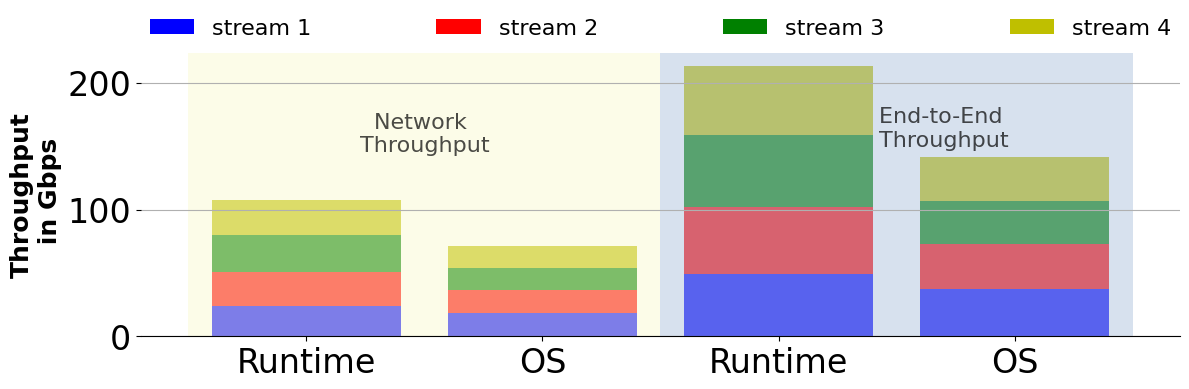

In [46]:
import matplotlib.pyplot as plt

dict1 = {'5080': (23.742395000000002, 48.926989), '6080': (26.790213, 52.92918), '7080': (29.145411, 57.336706), '8080': (27.783968, 53.848881999999996)}
dict2 = {'_8080_OS': (18.361652999999997, 37.105957000000004), '_7080_OS': (17.816817, 35.542413), '_6080_OS': (17.593003, 34.320958), '_5080_OS': (17.285471, 34.20554)}

# Extracting data from dictionaries
bar1 = [val[0] for val in dict1.values()]
bar2 = [val[0] for val in dict2.values()]
bar3 = [val[1] for val in dict1.values()]
bar4 = [val[1] for val in dict2.values()]

print (bar1, bar2, bar3, bar4)
# plt.bar(bar_positions, bar1, color='b', label='Dict1 First Values')
f_bar=[]
for i,z,k,l in zip(bar1,bar2,bar3,bar4):
    f_bar.append([i,z,k,l])
print(f_bar)

bar1=f_bar[0]
bar2=f_bar[1]
bar3=f_bar[2]
bar4=f_bar[3]

fig, ax = plt.subplots(figsize=(12, 4))



# Defining the bar positions
bar_positions = range(len(bar1))

# Plotting the bars
ax.bar(bar_positions, bar1, color='b', label='stream 1')
ax.bar(bar_positions, bar2, bottom=bar1, color='r', label='stream 2')
ax.bar(bar_positions, bar3, bottom=[i+j for i,j in zip(bar1, bar2)], color='g', label='stream 3')
ax.bar(bar_positions, bar4, bottom=[i+j+k for i,j,k in zip(bar1, bar2, bar3)], color='y', label='stream 4')

# Adding labels
# plt.xlabel('Keys')
# plt.ylabel('Values')
# plt.title('Stacked Bar Charts')
plt.xticks(bar_positions, dict1.keys())

ax.set_xticklabels(('Runtime', 'OS', 'Runtime', 'OS'))

# Grid in Y axis
ax.yaxis.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adding background colors
ax.axvspan(-0.5, len(bar_positions)/2-0.5, facecolor='#FAFAD2', alpha=0.5)
ax.axvspan(len(bar_positions)/2-0.5, len(bar_positions)-0.5, facecolor='#B0C4DE', alpha=0.5)
# Place legend above the highest gridline and set it to one row
ax.text(0.5, 200*0.8, 'Network \nThroughput', ha='center', va='center', fontsize=16, color='black', alpha=0.7)
ax.text(2.7, 205*0.8, 'End-to-End \nThroughput', ha='center', va='center', fontsize=16, color='black', alpha=0.7)


legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.,fontsize=16)
plt.xlabel('', fontsize=24,weight = 'bold')
plt.ylabel('Throughput\n in Gbps', fontsize=18,weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24)

# plt.legend(frameon=False)
legend.get_frame().set_edgecolor("none")

# Displaying the plot
plt.tight_layout()
plt.savefig('os-runtime_comparision.png')
plt.savefig('os-runtime_comparision.pdf')
plt.show()
